In [17]:
import numpy as np
import pandas as pd
import gc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dtypes = {
    'Src IP': 'category',
    'Src Port': 'uint16',
    'Dst IP': 'category',
    'Dst Port': 'uint16',
    'Protocol': 'category',
    'Flow Duration': 'uint32',
    'Tot Fwd Pkts': 'uint32',
    'Tot Bwd Pkts': 'uint32',
    'TotLen Fwd Pkts': 'float32',
    'TotLen Bwd Pkts': 'float32',
    'Fwd Pkt Len Max': 'float32',
    'Fwd Pkt Len Min': 'float32',
    'Fwd Pkt Len Mean': 'float32',
    'Fwd Pkt Len Std': 'float32',
    'Bwd Pkt Len Max': 'float32',
    'Bwd Pkt Len Min': 'float32',
    'Bwd Pkt Len Mean': 'float32',
    'Bwd Pkt Len Std': 'float32',
    'Flow Byts/s': 'float32',
    'Flow Pkts/s': 'float32',
    'Flow IAT Mean': 'float32',
    'Flow IAT Std': 'float32',
    'Flow IAT Max': 'float32',
    'Flow IAT Min': 'float32',
    'Fwd IAT Tot': 'float32',
    'Fwd IAT Mean': 'float32',
    'Fwd IAT Std': 'float32',
    'Fwd IAT Max': 'float32',
    'Fwd IAT Min': 'float32',
    'Bwd IAT Tot': 'float32',
    'Bwd IAT Mean': 'float32',
    'Bwd IAT Std': 'float32',
    'Bwd IAT Max': 'float32',
    'Bwd IAT Min': 'float32',
    'Fwd PSH Flags': 'category',
    'Bwd PSH Flags': 'category',
    'Fwd URG Flags': 'category',
    'Bwd URG Flags': 'category',
    'Fwd Header Len': 'uint32',
    'Bwd Header Len': 'uint32',
    'Fwd Pkts/s': 'float32',
    'Bwd Pkts/s': 'float32',
    'Pkt Len Min': 'float32',
    'Pkt Len Max': 'float32',
    'Pkt Len Mean': 'float32',
    'Pkt Len Std': 'float32',
    'Pkt Len Var': 'float32',
    'FIN Flag Cnt': 'category',
    'SYN Flag Cnt': 'category',
    'RST Flag Cnt': 'category',
    'PSH Flag Cnt': 'category',
    'ACK Flag Cnt': 'category',
    'URG Flag Cnt': 'category',
    'CWE Flag Count': 'category',
    'ECE Flag Cnt': 'category',
    'Down/Up Ratio': 'float32',
    'Pkt Size Avg': 'float32',
    'Fwd Seg Size Avg': 'float32',
    'Bwd Seg Size Avg': 'float32',
    'Fwd Byts/b Avg': 'uint32',
    'Fwd Pkts/b Avg': 'uint32',
    'Fwd Blk Rate Avg': 'uint32',
    'Bwd Byts/b Avg': 'uint32',
    'Bwd Pkts/b Avg': 'uint32',
    'Bwd Blk Rate Avg': 'uint32',
    'Subflow Fwd Pkts': 'uint32',
    'Subflow Fwd Byts': 'uint32',
    'Subflow Bwd Pkts': 'uint32',
    'Subflow Bwd Byts': 'uint32',
    'Init Fwd Win Byts': 'uint32',
    'Init Bwd Win Byts': 'uint32',
    'Fwd Act Data Pkts': 'uint32',
    'Fwd Seg Size Min': 'uint32',
    'Active Mean': 'float32',
    'Active Std': 'float32',
    'Active Max': 'float32',
    'Active Min': 'float32',
    'Idle Mean': 'float32',
    'Idle Std': 'float32',
    'Idle Max': 'float32',
    'Idle Min': 'float32',
    'Label': 'category'
}

In [3]:
df = pd.read_csv(
    '../dataset/final_dataset.csv',
    dtype=dtypes,
    parse_dates=['Timestamp'],
    usecols=[*dtypes.keys(), 'Timestamp'],
    engine='c',
    low_memory=True
)
del dtypes
gc.collect()

0

In [4]:
df.shape

(12794627, 83)

In [5]:
df.describe(datetime_is_numeric=True,include='all')

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,12794627,1.279463e+07,12794627,1.279463e+07,12794627,12794627,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,...,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,12794627.0,1.279463e+07,12794627.0,12794627.0,12794627
unique,36760,NaN,34321,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,172.31.69.25,NaN,172.31.69.25,NaN,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddos
freq,1767182,NaN,2485191,NaN,10489144,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6472647
mean,NaN,3.707054e+04,NaN,1.464290e+04,NaN,2018-01-28 01:43:58.150384640,8.223957e+06,2.719636e+01,4.974281e+00,1.125727e+03,...,8.117674e+00,1.369698e+05,6.936345e+04,2.049868e+05,9.030539e+04,3119924.0,1.093532e+05,3215790.5,3019043.5,NaN
min,NaN,0.000000e+00,NaN,0.000000e+00,NaN,2010-06-13 00:01:40,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,NaN
25%,NaN,4.430000e+02,NaN,8.000000e+01,NaN,2018-02-16 23:24:46,1.262000e+03,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,NaN
50%,NaN,5.059200e+04,NaN,8.000000e+01,NaN,2018-02-20 04:25:24,3.206600e+04,2.000000e+00,1.000000e+00,4.200000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,NaN
75%,NaN,5.621500e+04,NaN,3.855000e+04,NaN,2018-02-20 11:18:59,4.159749e+06,4.000000e+00,4.000000e+00,9.350000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,NaN
max,NaN,6.553500e+04,NaN,6.553500e+04,NaN,2018-02-22 00:35:54,4.294967e+09,3.096280e+05,2.919230e+05,9.908096e+06,...,4.800000e+01,1.132691e+08,7.523242e+07,1.132691e+08,1.132691e+08,119999736.0,7.639395e+07,119999736.0,119999736.0,NaN


In [6]:
colsToDrop = np.array(['Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg'])
gc.collect()

0

In [7]:
# counting unique values and checking for skewness in the data
rowbuilder = lambda col: {'col': col, 'unique_values': df[col].nunique(), 'most_frequent_value': df[col].value_counts().index[0],'frequency': df[col].value_counts(normalize=True).values[0]}
frequency = [rowbuilder(col) for col in df.select_dtypes(include=['category']).columns]
skewed = pd.DataFrame(frequency)
skewed = skewed[skewed['frequency'] >= 0.95]
colsToDrop = np.union1d(colsToDrop, skewed['col'].values)
colsToDrop
del skewed
del rowbuilder
del frequency
gc.collect()


0

In [8]:
missing = df.isna().sum()
missing = pd.DataFrame({'count': missing, '% of total': missing/len(df)*100}, index=df.columns)
colsToDrop = np.union1d(colsToDrop, missing[missing['% of total'] >= 50].index.values)
dropnaCols = missing[(missing['% of total'] > 0) & (missing['% of total'] <= 5)].index.values

In [9]:
df['Flow Byts/s'].replace(np.inf, np.nan, inplace=True)
df['Flow Pkts/s'].replace(np.inf, np.nan, inplace=True)
dropnaCols = np.union1d(dropnaCols, ['Flow Byts/s', 'Flow Pkts/s'])

In [10]:
colsToDrop

array(['Bwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd PSH Flags',
       'Bwd Pkts/b Avg', 'Bwd URG Flags', 'FIN Flag Cnt',
       'Fwd Blk Rate Avg', 'Fwd Byts/b Avg', 'Fwd PSH Flags',
       'Fwd Pkts/b Avg', 'Fwd URG Flags', 'URG Flag Cnt'], dtype=object)

In [11]:
dropnaCols

array(['Flow Byts/s', 'Flow Pkts/s'], dtype=object)

In [12]:
df.drop(columns=colsToDrop, inplace=True)
df.dropna(subset=dropnaCols, inplace=True)
gc.collect()

0

In [13]:
negValCols = ['Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min']
for col in negValCols:
  df = df[df[col] >= 0]

In [14]:
df.describe()

,Src Port,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,...,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,12746440.0,1.274644e+07,12746440.0,12746440.0
mean,3.720421e+04,1.450681e+04,8.249082e+06,2.713027e+01,4.780524e+00,1.129742e+03,2.792193e+03,2.932930e+02,7.120621e+00,7.648284e+01,...,2.423183e+01,8.074001e+00,1.374450e+05,6.961098e+04,2.056971e+05,9.061242e+04,3131266.0,1.097409e+05,3227475.5,3030029.0
std,2.516860e+04,2.299506e+04,2.481229e+07,1.715307e+03,1.126214e+02,5.489494e+04,1.624195e+05,3.934372e+02,1.977750e+01,9.446007e+01,...,1.714818e+03,9.126341e+00,2.305507e+06,1.402556e+06,3.055658e+06,1.938153e+06,12213410.0,1.417103e+06,12465935.0,12085933.0
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
25%,4.430000e+02,8.000000e+01,1.280000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
50%,5.062200e+04,8.000000e+01,3.276800e+04,2.000000e+00,1.000000e+00,4.200000e+01,1.150000e+02,4.000000e+01,0.000000e+00,3.600000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
75%,5.624600e+04,3.799400e+04,4.167191e+06,4.000000e+00,4.000000e+00,9.350000e+02,3.580000e+02,6.770000e+02,0.000000e+00,1.426667e+02,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
max,6.553500e+04,6.553500e+04,1.200000e+08,3.096280e+05,2.969500e+04,9.908096e+06,4.092150e+07,2.336000e+04,1.472000e+03,4.660441e+03,...,3.096280e+05,4.800000e+01,1.132691e+08,7.523242e+07,1.132691e+08,1.132691e+08,119999736.0,7.639395e+07,119999736.0,119999736.0


Text(0.5, 1.0, 'Target Variable')

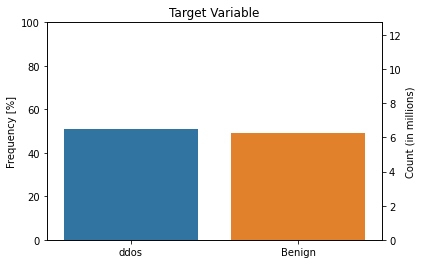

In [18]:
# plotting the target variable
labelCount = df['Label'].value_counts(normalize=True)*100
ax = sns.barplot(x=labelCount.index, y=labelCount.values)
ax1 = ax.twinx()
ax.set_ylabel('Frequency [%]')
ax1.set_ylabel("Count (in millions)")
ax1.set_ylim(0, len(df)/10**6)
ax.set_ylim(0, 100)
plt.title('Target Variable')

<AxesSubplot:xlabel='Protocol', ylabel='Count'>

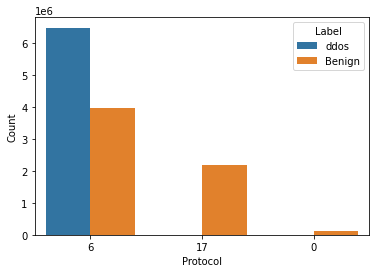

In [19]:
cnt = pd.crosstab(df['Protocol'], df['Label'])
cnt = cnt.stack().reset_index().rename(columns={0: 'Count'})
sns.barplot(x=cnt['Protocol'], y=cnt['Count'], hue=cnt['Label'])

In [20]:
def getNetworkClass(col):
  networkClasses = df[col].str.split('.',n=1, expand=True)[0]
  networkClasses = networkClasses.astype('uint8')
  networkClasses = pd.cut(
      networkClasses,
      bins=[0, 127, 191, 223, 239, np.inf],
      labels=['A', 'B', 'C', 'D', 'E'],
      include_lowest=True
  )
  return networkClasses

srcNetworkClass = getNetworkClass('Src IP')
dstNetworkClass = getNetworkClass('Dst IP')

<AxesSubplot:xlabel='Class', ylabel='Count'>

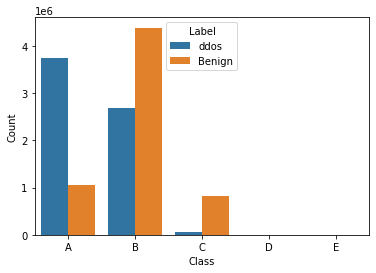

In [21]:
# Src IP
cnt = pd.crosstab(srcNetworkClass, df['Label'], rownames=['Class'])
cnt = cnt.stack().reset_index().rename(columns={0: 'Count'})
sns.barplot(x=cnt['Class'], y=cnt['Count'], hue=cnt['Label'])

<AxesSubplot:xlabel='Class', ylabel='Count'>

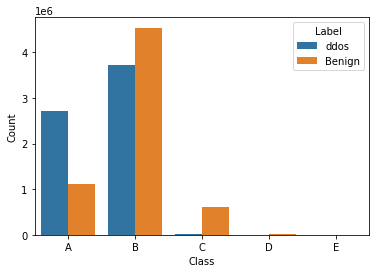

In [22]:
# Dst IP
cnt = pd.crosstab(dstNetworkClass, df['Label'], rownames=['Class'])
cnt = cnt.stack().reset_index().rename(columns={0: 'Count'})
sns.barplot(x=cnt['Class'], y=cnt['Count'], hue=cnt['Label'])

<AxesSubplot:xlabel='Tot Fwd Pkts', ylabel='Tot Bwd Pkts'>

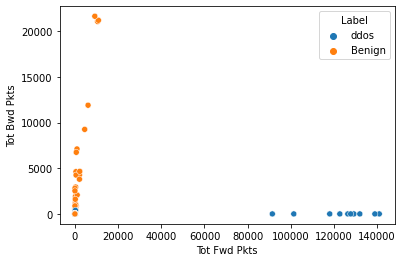

In [23]:
sns.scatterplot(x='Tot Fwd Pkts', y='Tot Bwd Pkts', hue='Label', data=df.sample(100000, random_state=42))

<AxesSubplot:xlabel='TotLen Fwd Pkts', ylabel='TotLen Bwd Pkts'>

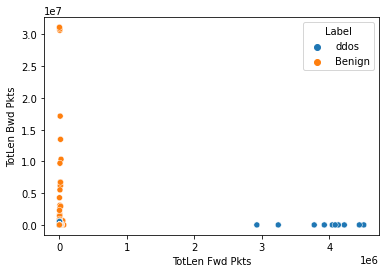

In [25]:
sns.scatterplot(x='TotLen Fwd Pkts', y='TotLen Bwd Pkts', hue='Label', data=df.sample(100000, random_state=42))

In [26]:
num_cols = df.select_dtypes(exclude=['category', 'datetime64[ns]']).columns
fwd_cols = [col for col in num_cols if 'Fwd' in col]
bwd_cols = [col for col in num_cols if 'Bwd' in col]

<AxesSubplot:>

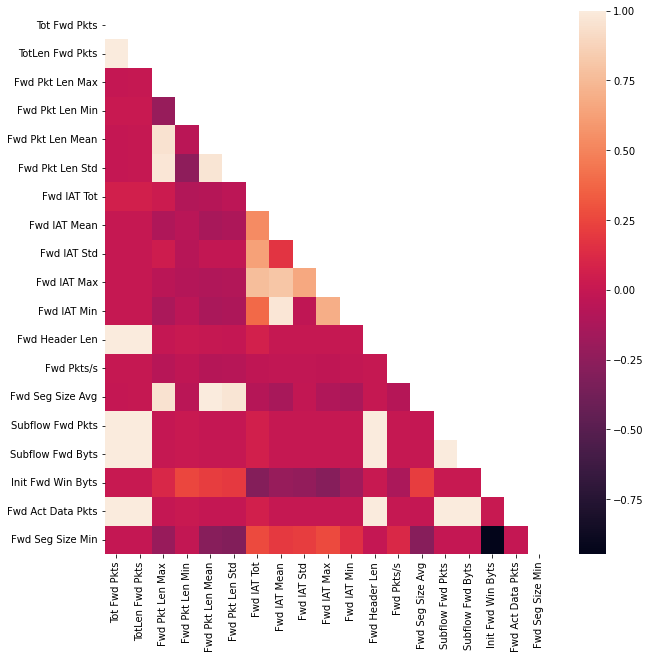

In [39]:
corr = df[fwd_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask)

In [40]:
def getCorrelatedFeatures(corr):
  correlatedFeatures = set()
  for i in range(len(corr.columns)):
    for j in range(i):
      if abs(corr.iloc[i, j]) > 0.8:
        correlatedFeatures.add(corr.columns[i])
  return correlatedFeatures

correlatedFeatures = set()
correlatedFeatures = correlatedFeatures | getCorrelatedFeatures(corr)
correlatedFeatures

{'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Fwd Seg Size Avg',
 'Fwd Seg Size Min',
 'Subflow Fwd Byts',
 'Subflow Fwd Pkts',
 'TotLen Fwd Pkts'}

<AxesSubplot:>

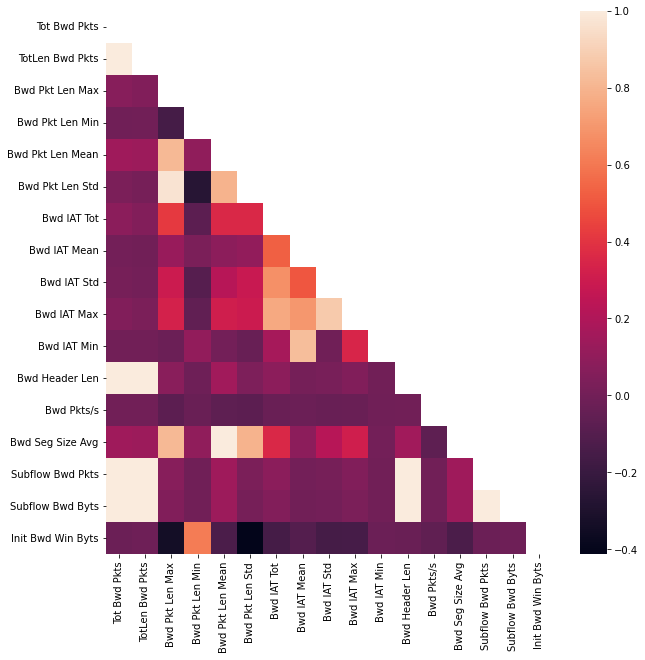

In [30]:
corr = df[bwd_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask)

In [31]:
correlatedFeatures = correlatedFeatures | getCorrelatedFeatures(corr)
correlatedFeatures

{'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Bwd Seg Size Avg',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Fwd Seg Size Avg',
 'Fwd Seg Size Min',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Fwd Pkts',
 'TotLen Bwd Pkts',
 'TotLen Fwd Pkts'}

In [33]:
num_cols = df.select_dtypes(exclude=['category', 'datetime64[ns]']).columns
cols = [col for col in num_cols if 'Fwd' in col or 'Bwd' in col]

<AxesSubplot:>

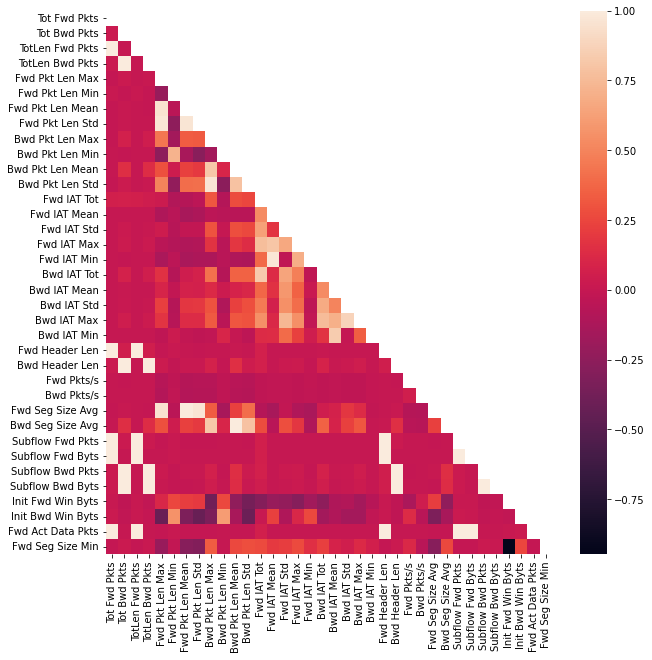

In [38]:
corr = df[cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask)

In [37]:
correlatedFeatures = correlatedFeatures | getCorrelatedFeatures(corr)
correlatedFeatures

{'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Bwd IAT Tot',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Bwd Seg Size Avg',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Fwd Seg Size Avg',
 'Fwd Seg Size Min',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Fwd Pkts',
 'TotLen Bwd Pkts',
 'TotLen Fwd Pkts'}

In [15]:
import socket
import struct

def ip2int(addr):
    return struct.unpack("!I", socket.inet_aton(addr))[0]

In [16]:
df.loc[:,'Src IP'] = df['Src IP'].apply(lambda x:ip2int(x)) 
df.loc[:,'Dst IP'] = df['Dst IP'].apply(lambda x:ip2int(x))
df.loc[:,'Timestamp'] = df['Timestamp'].values.astype(float)
df.loc[:,'SYN Flag Cnt'] = df['SYN Flag Cnt'].apply(lambda x:int(x))
df.loc[:,'RST Flag Cnt'] = df['RST Flag Cnt'].apply(lambda x:int(x))
df.loc[:,'PSH Flag Cnt'] = df['PSH Flag Cnt'].apply(lambda x:int(x))
df.loc[:,'ACK Flag Cnt'] = df['ACK Flag Cnt'].apply(lambda x:int(x))
df.loc[:,'CWE Flag Count'] = df['CWE Flag Count'].apply(lambda x:int(x))
df.loc[:,'ECE Flag Cnt'] = df['ECE Flag Cnt'].apply(lambda x:int(x))
df.loc[:,'Protocol'] = df['Protocol'].apply(lambda x:int(x))

In [17]:
df.to_csv('../data/intervehicle.csv',index=False)

In [19]:
from sklearn.model_selection import train_test_split

y_data = df.pop('Label')
x_data = df

In [23]:
train_x,test_x,train_y,test_y = train_test_split(x_data,y_data,test_size=0.2,random_state=0,shuffle=True)

In [24]:
train_x = train_x.reset_index(drop=True)
test_x = test_x.reset_index(drop=True) 
train_y = train_y.reset_index(drop=True)
test_y = test_y.reset_index(drop=True)

In [25]:
train_x['Label'] = train_y
test_x['Label'] = test_y

In [27]:
train_x.to_csv('../data/train-intervehicle.csv',index=False)
test_x.to_csv('../data/test-intervehicle.csv',index=False)